In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter # element 개수 셀 때 사용
from wordcloud import WordCloud

In [2]:
!pip install konlpy
import konlpy

In [3]:
# clustering
! pip install soyclustering
from sklearn.feature_extraction.text import CountVectorizer # 벡터화
from sklearn.feature_extraction.text import TfidfTransformer # tfidf
from soyclustering import SphericalKMeans # clustering

In [4]:
df_blog = pd.read_csv("/home/piai/AI/4week/newtokenizer/ratings_test.txt", sep = "\t", nrows=500)
df_blog.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [5]:
descriptions = df_blog["document"].to_list() # 블로그 내용
descriptions[0:10]

['굳 ㅋ',
 'GDNTOPCLASSINTHECLUB',
 '뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아',
 '지루하지는 않은데 완전 막장임... 돈주고 보기에는....',
 '3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??',
 '음악이 주가 된, 최고의 음악영화',
 '진정한 쓰레기',
 '마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다',
 '갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다',
 '이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..']

In [6]:
# !pip install knolpy
from konlpy.tag import Okt

parser_kor = Okt()
parser_kor.pos(descriptions[3])[:10]

[('지루하지는', 'Adjective'),
 ('않은데', 'Verb'),
 ('완전', 'Noun'),
 ('막장', 'Noun'),
 ('임', 'Noun'),
 ('...', 'Punctuation'),
 ('돈', 'Noun'),
 ('주고', 'Verb'),
 ('보기', 'Noun'),
 ('에는', 'Josa')]

In [7]:
morphs = []         # 단어를 담을 리스트
for sentence in descriptions:                     # 리스트에서 각 문장 추출
    morphs.append(parser_kor.pos(sentence))  # 문장별 형태소 분석 결과 추가

In [8]:
morphs[2]

[('뭐', 'Noun'),
 ('야', 'Josa'),
 ('이', 'Noun'),
 ('평점', 'Noun'),
 ('들', 'Suffix'),
 ('은', 'Josa'),
 ('....', 'Punctuation'),
 ('나쁘진', 'Adjective'),
 ('않지만', 'Verb'),
 ('10', 'Number'),
 ('점', 'Noun'),
 ('짜', 'Verb'),
 ('리', 'Noun'),
 ('는', 'Josa'),
 ('더', 'Noun'),
 ('더욱', 'Noun'),
 ('아니잖아', 'Adjective')]

# 3

In [9]:
noun_list=[]  # 명사만 모은 리스트
for wt in morphs: # description 별 pos tagging결과
    noun_list += [word for word, tag in wt if tag == 'Noun' ]

In [10]:
print(", ".join(noun_list))

뭐, 이, 평점, 점, 리, 더, 더욱, 완전, 막장, 임, 돈, 보기, 만, 별, 다섯, 개, 왜, 로, 제, 심기, 음악, 주가, 최고, 음악, 영화, 쓰레기, 마치, 미국, 애니, 창의력, 로봇, 디자인, 고개, 갈수록, 개판, 중국영화, 내용, 폼, 말, 무기, 남무, 동사서독, 영화, 이건, 류, 류작, 이별, 아픔, 뒤, 인연, 기쁨, 모든, 사람, 포켓몬스터, 잼밌, 한국, 독립영화, 한계, 아버지, 비교, 청춘, 그, 움, 이성, 찰나, 움, 포착, 수채화, 퀴어, 영화, 눈, 반전, 영화, 흡인, 스토리, 연출, 연기, 비주, 얼, 등, 영화, 기본, 조차, 영화, 무슨, 평, 해, 영화, 김문옥, 감독, 내, 영화, 경력, 몇, 조무래기, 내, 영화, 평론, 마인드, 소위, 가라, 평점, 뭐, 최고, 발연기, 도저히, 진짜, 연기, 상상, 나이스, 별, 재미, 우려, 챔프, 방송, 몇번, 금요일, 나이트메어, 시리즈, 가장, 시리즈, 양산, 헬레, 저, 시리즈, 편, 작가, 상상력, 작품, 갈고리, 사지, 고어씬, 지금, 보더, 충격, 나름, 교훈, 평점, 질, 섹스, 코미디, 꽤, 영화, 민주화, 시대, 영혼, 관음, 욕구, 분출, 인상, 일본, 천황, 미국, 면죄부, 과정, 루즈, 때, 어미, 알, 부스, 름, 분, 저, 아래, 영화, 제대로, 안, 알, 새끼, 그냥, 가면, 그, 놈, 것임, 놈, 두, 놈, 막, 게, 작살, 낼, 수, 번은, 어쩜, 실화, 더욱, 벌써, 이건, 뭐, 노답, 어린이, 영화, 좀, 보고, 지금, 영화, 마음, 가장, 영화, 안보, 후회, 평점, 점도, 주기, 영화, 배우, 감독, 사람, 화판, 평점, 알바생, 티, 정말, 진짜, 표현, 영화, 액션, 시나리오, 왜그러지, 막판, 대동단결, 은, 재미, 시간, 북괴, 우리, 주적, 뿐, 난생처음, 로그인, 평점, 개, 알바, 속지, 시간, 낭비, 진짜, 평점, 마이너스, 오만, 셰익스피어, 셰익스피어, 이영화, 이영화, 한국영, 특선, 개막, 작, 선정, 궁금

In [11]:
Counter(noun_list).most_common(10)

[('영화', 152),
 ('것', 29),
 ('점', 25),
 ('드라마', 25),
 ('이', 24),
 ('진짜', 24),
 ('평점', 23),
 ('보고', 22),
 ('사람', 21),
 ('생각', 21)]

In [12]:
worddict = Counter(noun_list) # key : 단어, value : 등장횟수

over_5 = [k for k, v in worddict.items() if int(v)>5]
over_5

['뭐',
 '이',
 '평점',
 '점',
 '더',
 '완전',
 '임',
 '돈',
 '왜',
 '음악',
 '최고',
 '영화',
 '쓰레기',
 '미국',
 '내용',
 '말',
 '이건',
 '사람',
 '그',
 '반전',
 '스토리',
 '연출',
 '연기',
 '감독',
 '내',
 '진짜',
 '재미',
 '시리즈',
 '가장',
 '저',
 '편',
 '작품',
 '지금',
 '때',
 '알',
 '안',
 '그냥',
 '게',
 '수',
 '좀',
 '보고',
 '마음',
 '배우',
 '정말',
 '액션',
 '시간',
 '우리',
 '알바',
 '이영화',
 '감동',
 '것',
 '걸',
 '드라마',
 '현실',
 '정도',
 '못',
 '또',
 '주인공',
 '볼',
 '거',
 '함',
 '매력',
 '사랑',
 '이야기',
 '별로',
 '느낌',
 '나',
 '여자',
 '다시',
 '앞',
 '생각',
 '장면',
 '마지막',
 '제일',
 '모습',
 '하나',
 '때문',
 '역시',
 '최악',
 '기억',
 '공포영화',
 '삶',
 '인생']

In [13]:
# 불필요한 명사 리스트
removelist = ['뭐', '이', '더', '임', '그', '내', '저', '때', '알', '안',
              '게', '수', '좀', '것', '걸', '못', '또', '함', '나', '앞', '볼', '거']

In [14]:
for word in removelist:
    if word in worddict.keys():
        del worddict[word]

worddict.most_common(30)

[('영화', 152),
 ('점', 25),
 ('드라마', 25),
 ('진짜', 24),
 ('평점', 23),
 ('보고', 22),
 ('사람', 21),
 ('생각', 21),
 ('이건', 20),
 ('스토리', 20),
 ('정말', 20),
 ('연기', 19),
 ('재미', 18),
 ('최고', 15),
 ('감독', 15),
 ('시간', 15),
 ('말', 14),
 ('왜', 13),
 ('다시', 13),
 ('쓰레기', 12),
 ('내용', 12),
 ('감동', 12),
 ('완전', 11),
 ('배우', 11),
 ('돈', 10),
 ('이야기', 10),
 ('느낌', 10),
 ('그냥', 9),
 ('여자', 9),
 ('마지막', 9)]

In [15]:
# font_path = './NanumGothic.ttf'
# background_color='white'
# colormap = 'Accent_r'
# width = 800
# height = 800
wordcloud = WordCloud(
    font_path = './NanumGothic.ttf', #한글 사용 위해서 /usr/share/fonts/truetype/nanum
    background_color='white',       # 배경 색깔 정하기
    colormap = 'Blues_r',          # 폰트 색깔" Accent_r, Blues_r, CMRmap_r, viridis_r, rainbow_r, Set1_r, Spectral_r, Pastel1_r
    width = 800,
    height = 800
)

In [16]:
worddict

Counter({'영화': 152,
         '점': 25,
         '드라마': 25,
         '진짜': 24,
         '평점': 23,
         '보고': 22,
         '사람': 21,
         '생각': 21,
         '이건': 20,
         '스토리': 20,
         '정말': 20,
         '연기': 19,
         '재미': 18,
         '최고': 15,
         '감독': 15,
         '시간': 15,
         '말': 14,
         '왜': 13,
         '다시': 13,
         '쓰레기': 12,
         '내용': 12,
         '감동': 12,
         '완전': 11,
         '배우': 11,
         '돈': 10,
         '이야기': 10,
         '느낌': 10,
         '그냥': 9,
         '여자': 9,
         '마지막': 9,
         '시리즈': 8,
         '편': 8,
         '마음': 8,
         '이영화': 8,
         '주인공': 8,
         '매력': 8,
         '장면': 8,
         '미국': 7,
         '가장': 7,
         '작품': 7,
         '지금': 7,
         '우리': 7,
         '정도': 7,
         '사랑': 7,
         '모습': 7,
         '하나': 7,
         '때문': 7,
         '기억': 7,
         '음악': 6,
         '반전': 6,
         '연출': 6,
         '액션': 6,
         '알바': 6,
         '현실': 

In [17]:
wordcloud.generate_from_frequencies(worddict)

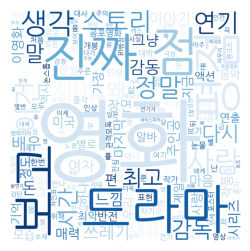

In [18]:
fig = plt.figure(figsize=(3, 3))  # 그림 크기 설정
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [19]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(noun_list)
X
# 4 문서 갯수 9: 단어 갯수

<2908x1192 sparse matrix of type '<class 'numpy.int64'>'
	with 2245 stored elements in Compressed Sparse Row format>

In [20]:
type(X)

scipy.sparse._csr.csr_matrix

In [21]:
# 'This is the first document.', [0, 1, 1, 1, 0, 0, 1, 0, 1]
#  'This is the first document.',
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
vectorizer.get_feature_names_out()

array(['가끔', '가다가', '가득', ..., '흰둥이', '히스테리', '힐러리'], dtype=object)

In [23]:
vectorizer.vocabulary_

{'평점': 1097,
 '더욱': 236,
 '완전': 740,
 '막장': 303,
 '보기': 419,
 '다섯': 203,
 '심기': 599,
 '음악': 782,
 '주가': 934,
 '최고': 1014,
 '영화': 714,
 '쓰레기': 604,
 '마치': 300,
 '미국': 365,
 '애니': 636,
 '창의력': 995,
 '로봇': 283,
 '디자인': 259,
 '고개': 71,
 '갈수록': 16,
 '개판': 40,
 '중국영화': 951,
 '내용': 174,
 '무기': 352,
 '남무': 168,
 '동사서독': 251,
 '이건': 789,
 '류작': 287,
 '이별': 796,
 '아픔': 621,
 '인연': 828,
 '기쁨': 131,
 '모든': 340,
 '사람': 463,
 '포켓몬스터': 1107,
 '잼밌': 873,
 '한국': 1128,
 '독립영화': 248,
 '한계': 1127,
 '아버지': 611,
 '비교': 449,
 '청춘': 1005,
 '이성': 802,
 '찰나': 990,
 '포착': 1106,
 '수채화': 553,
 '퀴어': 1051,
 '반전': 389,
 '흡인': 1185,
 '스토리': 568,
 '연출': 704,
 '연기': 698,
 '비주': 454,
 '기본': 129,
 '조차': 921,
 '무슨': 356,
 '김문옥': 138,
 '감독': 17,
 '경력': 63,
 '조무래기': 917,
 '평론': 1095,
 '마인드': 298,
 '소위': 531,
 '가라': 3,
 '발연기': 391,
 '도저히': 246,
 '진짜': 976,
 '상상': 477,
 '나이스': 157,
 '재미': 867,
 '우려': 755,
 '챔프': 998,
 '방송': 395,
 '몇번': 337,
 '금요일': 125,
 '나이트메어': 158,
 '시리즈': 579,
 '가장': 8,
 '양산': 650,
 '헬레': 1158,
 '작가': 854

In [24]:
nouns = []
for sentence in descriptions:
    nouns += parser_kor.nouns(sentence)
noun_counter = Counter(nouns)
nouns_over2 = [word for word, freq in noun_counter.items() if freq >= 2] # 5번 이상 나온 명사들의 리스트

In [25]:
nouns_over2[:5] # 5번 이상 나온 word

['뭐', '이', '평점', '점', '더']

In [26]:
# 문장 --> tokenizer --> 명사만 남김
# 명사 중에서 전체 에서에서 2번 이상 나온 경우의 명사 남김
# 미리 2번 이상 나오는 단어 집합이 필요합니다. (noun_freq 를 미리 만들어야함)

noun_description = []
for description in descriptions:
  desc_nouns_all = parser_kor.nouns(description)
  desc_nouns_over2 = [word for word in desc_nouns_all if word in nouns_over2]
  noun_description.append(' '.join(desc_nouns_over2))

In [27]:
print(noun_description[0])
print(noun_description[1])
print(noun_description[2])



뭐 이 평점 점 더 더욱


In [28]:
# 문장 -> 벡터화 (TF-IDF) -> 비슷한 벡터끼리 모으기 --> 클러스터가 만들어짐
# TF-IDF 하려면 counter vecterizer를 만들어야함


vectorizer = CountVectorizer() # 한국어 pos, 명사, freq>2
X = vectorizer.fit_transform(noun_description) # 한국어를 잘하게 된다.
X
# 100 : 전체 document 수 ( 블로그 글 갯수)
# 395 : 명사, frequency 2 이상인 명사들의 집합

<500x288 sparse matrix of type '<class 'numpy.int64'>'
	with 1224 stored elements in Compressed Sparse Row format>

In [29]:
vectorizer.get_feature_names_out()

array(['가끔', '가슴', '가장', '가족', '간만', '감독', '감동', '감상', '감성', '감정', '감탄',
       '강추', '개그', '개막', '개봉', '개인', '거리', '건가', '결론', '결말', '고뇌', '공간',
       '공감', '공포영화', '과잉', '과정', '관객모독', '관계', '관심', '군인', '그냥', '그림',
       '극장', '글쎄', '기대', '기세', '기억', '나름', '남자', '낭비', '내용', '네이버', '노래',
       '노잼', '논스톱', '누구', '눈물', '느낌', '늑대인간', '능력', '다가', '다른', '다시',
       '단순', '대박', '대사', '대안', '대체', '대충', '대해', '댓글', '더욱', '독립영화',
       '드라마', '때문', '라면', '라이언', '로맨스', '로봇', '루즈', '마무리', '마음', '마지막',
       '막장', '만들기', '만화', '매력', '머리', '멜로', '명작', '명품', '몇번', '모두', '모든',
       '모습', '목록', '몰입', '몰입도', '묘사', '무리', '무비', '무슨', '무엇', '무조건', '뭔가',
       '미국', '바람', '바로', '바보', '바지', '박준형', '반전', '발연기', '발전', '배우',
       '뱀파이어', '별로', '보고', '보기', '보이', '보지', '본적', '볼때', '봣다', '부분', '불가',
       '비교', '비현실적', '빌어먹을', '빵점', '사극', '사람', '사랑', '사실', '상상', '상업',
       '색감', '생각', '설명', '성장', '섹스', '셰익스피어', '소재', '속편', '수고', '수준',
       '수채화', '스릴러', '스스로', '스타일', '스토리', '시간', '시나리오', '시대', '시

In [30]:
X.toarray()[0] # 첫번째 블로그 글, 0 이 이미 많음

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [31]:
vectorizer.vocabulary_

{'평점': 271,
 '더욱': 61,
 '완전': 179,
 '막장': 73,
 '보기': 108,
 '음악': 189,
 '최고': 256,
 '영화': 177,
 '쓰레기': 149,
 '미국': 95,
 '애니': 157,
 '로봇': 68,
 '내용': 40,
 '이건': 192,
 '모든': 83,
 '사람': 121,
 '독립영화': 62,
 '한계': 276,
 '아버지': 152,
 '비교': 116,
 '청춘': 254,
 '수채화': 136,
 '반전': 101,
 '스토리': 140,
 '연출': 174,
 '연기': 171,
 '무슨': 91,
 '감독': 5,
 '발연기': 102,
 '진짜': 247,
 '상상': 124,
 '재미': 219,
 '몇번': 81,
 '시리즈': 144,
 '가장': 2,
 '작가': 216,
 '작품': 217,
 '지금': 242,
 '나름': 37,
 '섹스': 130,
 '코미디': 262,
 '시대': 143,
 '인상': 207,
 '일본': 210,
 '과정': 25,
 '루즈': 69,
 '아래': 150,
 '제대로': 228,
 '그냥': 30,
 '실화': 147,
 '보고': 107,
 '마음': 71,
 '후회': 286,
 '점도': 223,
 '배우': 104,
 '정말': 225,
 '표현': 273,
 '액션': 158,
 '시나리오': 142,
 '시간': 141,
 '우리': 183,
 '알바': 156,
 '낭비': 39,
 '셰익스피어': 131,
 '이영화': 198,
 '한국영': 277,
 '개막': 13,
 '감동': 6,
 '이해': 203,
 '졸작': 236,
 '이유': 199,
 '멜로': 78,
 '코믹': 263,
 '스타일': 139,
 '제임스': 233,
 '어디': 162,
 '드라마': 63,
 '극장': 32,
 '기대': 34,
 '감탄': 10,
 '아주': 154,
 '왜케': 180,
 '얘기': 161,
 '관심': 28,


# 4

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer

In [33]:
tfidf = TfidfTransformer()
# X " counter vectorize result"
X_tfidf = tfidf.fit_transform(X)

In [34]:
X.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [35]:
X_tfidf.toarray()[0] # 중요도를 곱해줌

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# 5

In [36]:
np.int = np.int32
kmeans = SphericalKMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_tfidf)
labels

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 3, 2,
       0, 0, 0, 3, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 2, 0, 0, 2, 0, 3, 0, 3, 0, 0, 0, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 2, 3,
       0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0,

In [37]:
# descriptions, clustering 결과 dataframe 생성
df_descriptions = pd.DataFrame({"document": noun_description, "label": labels})
df_descriptions.head()

,document,label
0,,0
1,,0
2,뭐 이 평점 점 더 더욱,2
3,완전 막장 임 돈 보기,2
4,별 개 왜 로 제,0


In [38]:
for i in range(4):
    lists = df_descriptions.loc[df_descriptions["label"] == i, "document"].to_list()
    for sentence in lists:
        nouns += sentence.split()
    print(f"cluster{i}: {Counter(nouns).most_common(10)}")
    print("")

cluster0: [('영화', 296), ('것', 53), ('이', 44), ('진짜', 42), ('점', 41), ('사람', 39), ('스토리', 38), ('연기', 37), ('생각', 37), ('더', 36)]

cluster1: [('영화', 296), ('것', 53), ('이', 44), ('진짜', 42), ('점', 41), ('사람', 39), ('스토리', 38), ('연기', 37), ('생각', 37), ('더', 36)]

cluster2: [('영화', 300), ('것', 54), ('평점', 46), ('점', 46), ('이', 45), ('진짜', 43), ('사람', 42), ('생각', 41), ('스토리', 40), ('정말', 39)]

cluster3: [('영화', 304), ('것', 58), ('점', 50), ('드라마', 50), ('이', 48), ('진짜', 48), ('평점', 46), ('보고', 44), ('사람', 42), ('생각', 42)]



# 6

In [39]:
def get_wordcloud(texts):
    # 문장리스트를 받아와
    # 커스텀 토크나이저를 이용해 최소 2번 이상 출현한 명사들만 추출
    # Counter를 이용하여 명사별 빈도를 측정하고
    # wordcloud 학습
    wordcloud = WordCloud(
        font_path = './NanumGothic.ttf', #한글 사용 위해서
        background_color='white',       # 배경 색깔 정하기
        colormap = 'Accent_r',          # 폰트 색깔" Accent_r, Blues_r, CMRmap_r, viridis_r, rainbow_r, Set1_r, Spectral_r, Pastel1_r
        width = 800, height = 800)
    texts = ' '.join(texts)
    nouns = texts.split()
    noun_counter = Counter(nouns)
    wordcloud.generate_from_frequencies(noun_counter)
    return wordcloud

In [40]:
wc = get_wordcloud(noun_description)

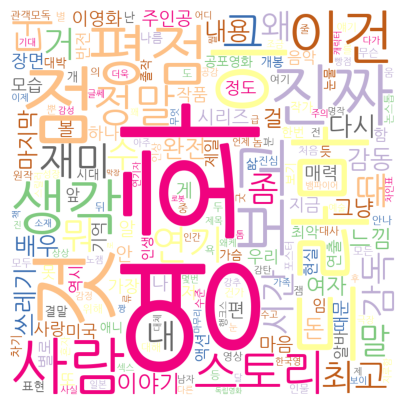

In [41]:
fig = plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

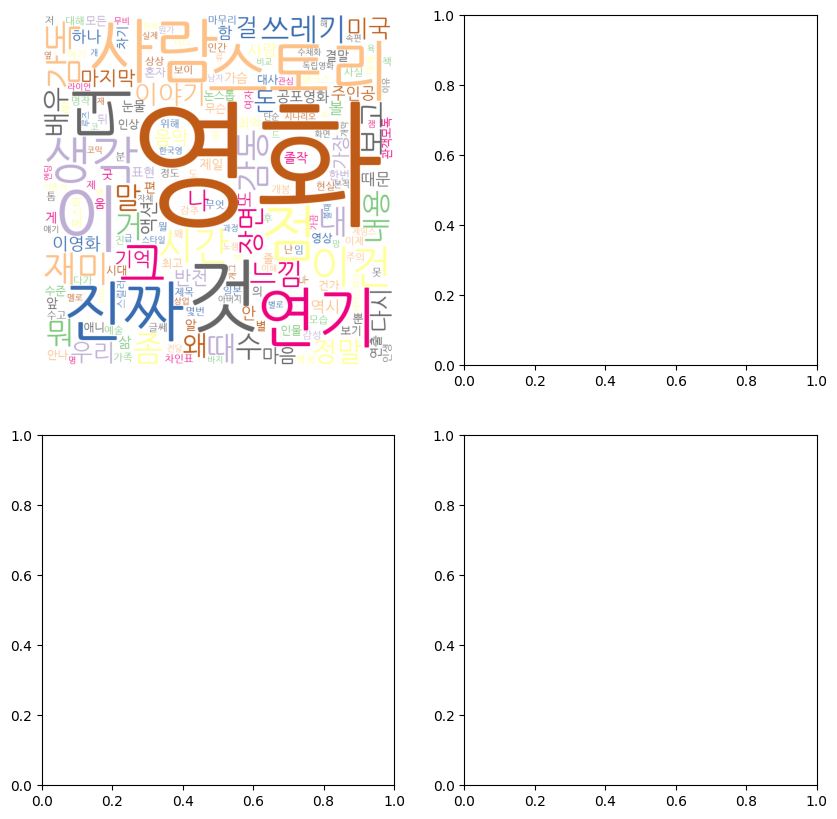

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    texts = df_descriptions.loc[df_descriptions['label']==i, "document"].to_list()
    wc = get_wordcloud(texts)
    axes[i//2, i%2].imshow(wc)
    axes[i//2, i%2].axis("off")
plt.show()

In [43]:
!pip install konlpy # 한국어 토크나이저
!pip install nltk # 영어 토크나이저

In [44]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False df_blog